In [1]:
!pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

##############
file_name='d.DBN_results/S2_DBN_results.csv'
df = pd.read_csv(file_name, encoding="UTF-8").copy()
df['Node'] = df['Node'].map(lambda x : 'Node '+str(x))
df.rename(columns={'1':'probability (100s elapsed)', '2':'probability (200s elapsed)', '3':'probability (300s elapsed)', '4': 'probability (400s elapsed)'}, inplace=True)
first_slice=df[['Node', 'probability (100s elapsed)']]
second_slice=df[['Node', 'probability (200s elapsed)']]
third_slice=df[['Node', 'probability (300s elapsed)']]
fourth_slice = df[['Node', 'probability (400s elapsed)']]


In [3]:
##############
file_name = "d.smokedetector_t/0549_smokep_avg.csv"
sd=pd.read_csv(file_name, encoding='UTF-8')
sd_df=sd.copy()
sd_df=sd_df.fillna(0)
sd_df

,Unnamed: 0,100s,200s,300s,400s
0,Node 1,0.000313,0.003880,0.010036,0.020543
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000000,0.000123,0.002346,0.010265
3,Node 4,0.000000,0.000114,0.002351,0.010706
4,Node 5,0.000000,0.000097,0.003375,0.013640
...,...,...,...,...,...
60,Node 61,0.000309,0.002772,0.007653,0.015094
61,Node 62,0.000000,0.000586,0.004781,0.012873
62,Node 63,0.000000,0.000828,0.005777,0.014698
63,Node 64,0.000010,0.000770,0.004419,0.011692


In [4]:
sd_df = sd_df.rename(columns = {'Unnamed: 0' : 'Node'})
sd_df

,Node,100s,200s,300s,400s
0,Node 1,0.000313,0.003880,0.010036,0.020543
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000000,0.000123,0.002346,0.010265
3,Node 4,0.000000,0.000114,0.002351,0.010706
4,Node 5,0.000000,0.000097,0.003375,0.013640
...,...,...,...,...,...
60,Node 61,0.000309,0.002772,0.007653,0.015094
61,Node 62,0.000000,0.000586,0.004781,0.012873
62,Node 63,0.000000,0.000828,0.005777,0.014698
63,Node 64,0.000010,0.000770,0.004419,0.011692


#### Pearson 상관계수

<Axes: >

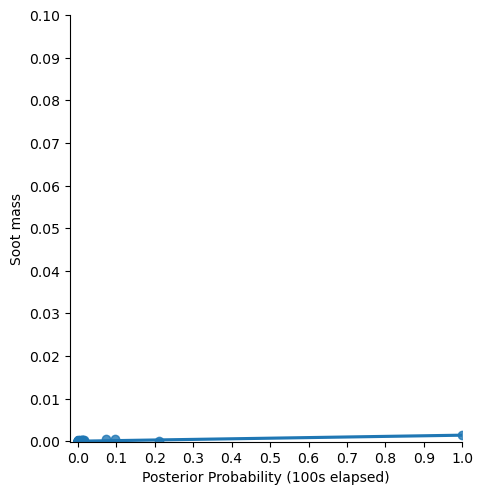

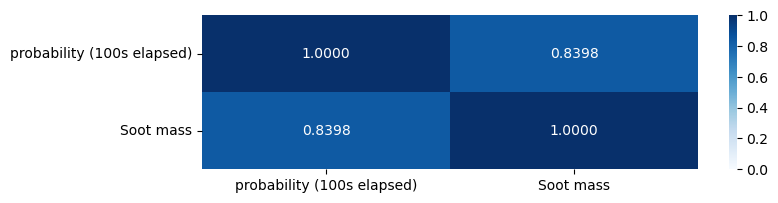

In [5]:
# 100s elapsed
sd_df_1st = sd_df[['Node', '100s']]
sd_df_1st = sd_df_1st.rename(columns = {'100s':'Soot mass'})

df_1st=pd.merge(first_slice, sd_df_1st)
#set_1 = set(df_1st[(df_1st['probability (100s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_1st[(df_1st['Soot mass'] == 0)].index.tolist())
#df_1st_index = list((set_1 | set_2))
#df_1st.drop(df_1st_index, inplace=True)

g1= sns.lmplot(data=df_1st, x='probability (100s elapsed)', y='Soot mass', ci=None)
g1=(g1.set_axis_labels("Posterior Probability (100s elapsed)", 'Soot mass')).set(xlim=(-0.02, 0.12), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks = [0,0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_1st_corr=df_1st[['probability (100s elapsed)', 'Soot mass']].corr(method='pearson')
sns.heatmap(df_1st_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

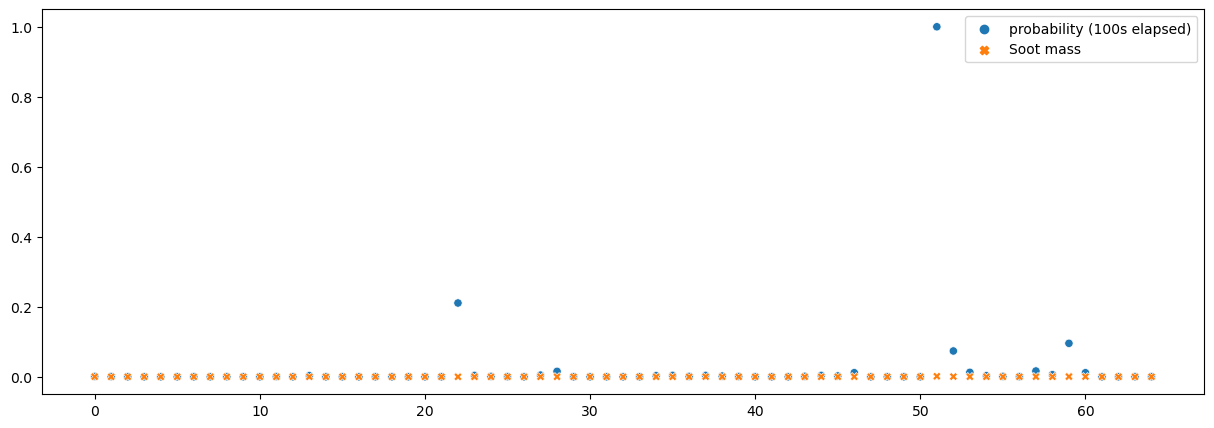

In [6]:
df_1st_multiply = df_1st.copy()
df_1st_multiply['Soot mass'] = df_1st_multiply['Soot mass']
df_1st_multiply['probability (100s elapsed)'] = df_1st_multiply['probability (100s elapsed)']
plt.figure(figsize=(15,5))
lineplot_1= sns.scatterplot(data=df_1st_multiply[['probability (100s elapsed)', 'Soot mass']])

<Axes: >

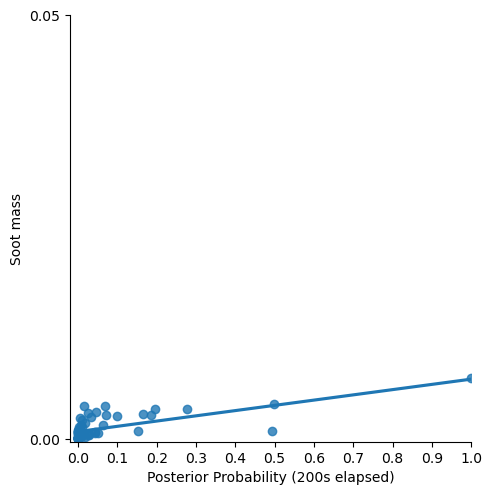

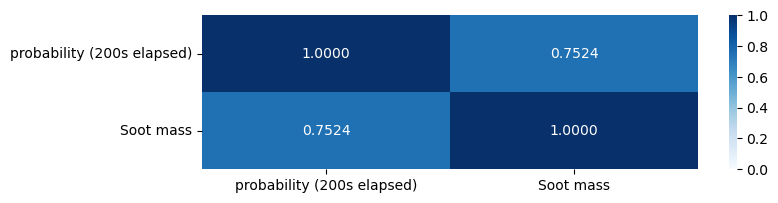

In [7]:
# 200s elapsed
sd_df_2nd = sd_df[['Node', '200s']]
sd_df_2nd = sd_df_2nd.rename(columns = {'200s':'Soot mass'})

df_2nd=pd.merge(second_slice, sd_df_2nd)
#set_1 = set(df_2nd[(df_2nd['probability (200s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_2nd[(df_2nd['Soot mass'] == 0)].index.tolist())
#df_2nd_index = list((set_1 | set_2))
#df_2nd.drop(df_2nd_index, inplace=True)

g2= sns.lmplot(data=df_2nd, x='probability (200s elapsed)', y='Soot mass', ci=None)
g2=(g2.set_axis_labels("Posterior Probability (200s elapsed)", 'Soot mass')).set(xlim=(-0.02, 0.12), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1.0], yticks = [0,0.05])
plt.figure(figsize=(8,2))
df_2nd_corr=df_2nd[['probability (200s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_2nd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

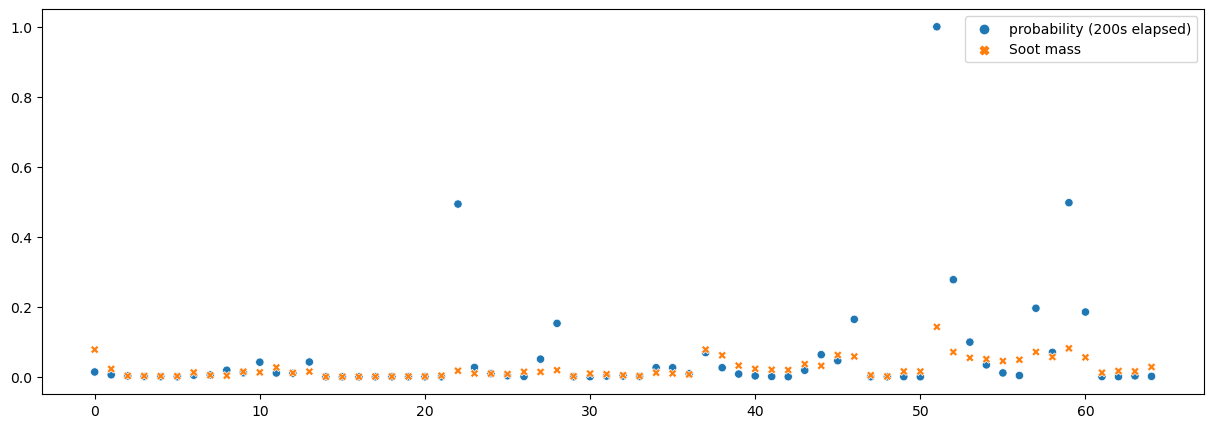

In [8]:
df_2nd_multiply = df_2nd.copy()
df_2nd_multiply['Soot mass'] = df_2nd_multiply['Soot mass'] *20
df_2nd_multiply['probability (200s elapsed)'] = df_2nd_multiply['probability (200s elapsed)']
plt.figure(figsize=(15,5))
lineplot_1= sns.scatterplot(data=df_2nd_multiply[['probability (200s elapsed)', 'Soot mass']])

<Axes: >

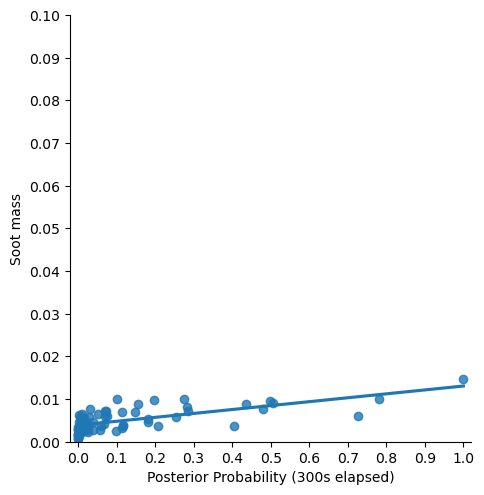

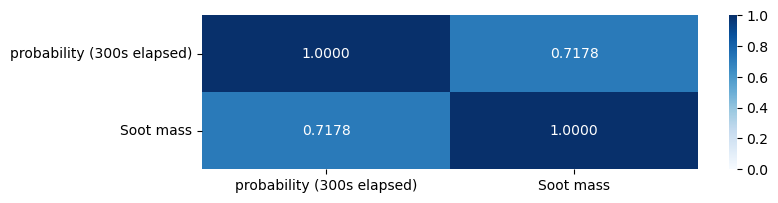

In [9]:
# 300s elapsed
sd_df_3rd = sd_df[['Node', '300s']]
sd_df_3rd = sd_df_3rd.rename(columns = {'300s':'Soot mass'})

df_3rd=pd.merge(third_slice, sd_df_3rd)
#set_1 = set(df_3rd[(df_3rd['probability (300s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_3rd[(df_3rd['Soot mass'] == 0)].index.tolist())
#df_3rd_index = list((set_1 | set_2))
#df_3rd.drop(df_3rd_index, inplace=True)

g3= sns.lmplot(data=df_3rd, x='probability (300s elapsed)', y='Soot mass', ci=None)
g3=(g3.set_axis_labels("Posterior Probability (300s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_3rd_corr=df_3rd[['probability (300s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_3rd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

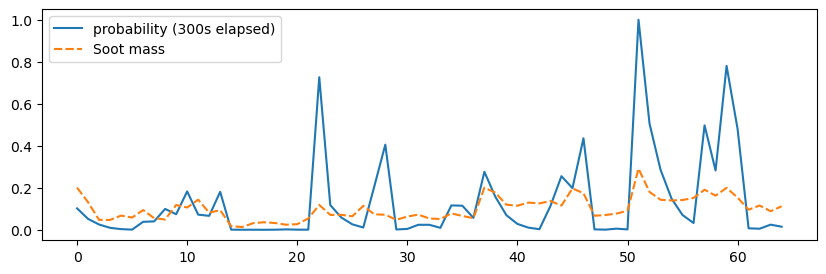

In [10]:
df_3rd_multiply = df_3rd.copy()
df_3rd_multiply['Soot mass'] = df_3rd_multiply['Soot mass']*20
df_3rd_multiply['probability (300s elapsed)'] = df_3rd_multiply['probability (300s elapsed)']
plt.figure(figsize=(10,3))
lineplot_1= sns.lineplot(data=df_3rd_multiply[['probability (300s elapsed)', 'Soot mass']])

<Axes: >

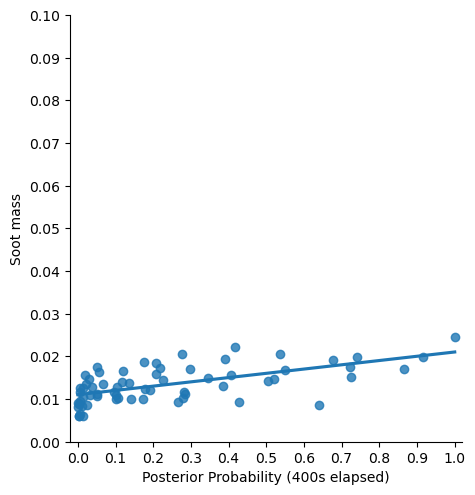

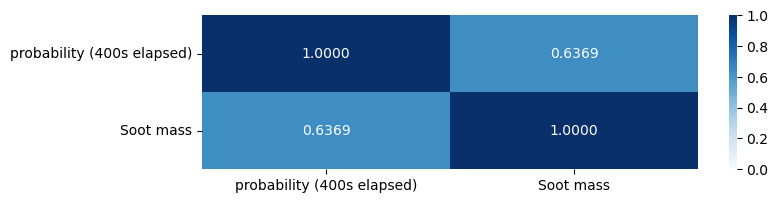

In [11]:
# 400s elapsed
sd_df_4th = sd_df[['Node', '400s']]
sd_df_4th = sd_df_4th.rename(columns = {'400s':'Soot mass'})

df_4th=pd.merge(fourth_slice, sd_df_4th)
#set_1 = set(df_4th[(df_4th['probability (400s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_4th[(df_4th['Soot mass'] == 0)].index.tolist())
#df_4th_index = list((set_1 | set_2))
#df_4th.drop(df_4th_index, inplace=True)

g4= sns.lmplot(data=df_4th, x='probability (400s elapsed)', y='Soot mass', ci=None)
g4=(g4.set_axis_labels("Posterior Probability (400s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_4th_corr=df_4th[['probability (400s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_4th_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

### 검정

#### Z normalized / pearsonr / spearmanr 함수 정의

In [12]:
import math
import numpy as np

In [13]:
p_df_1st = df_1st
p_df_2nd = df_2nd
p_df_3rd = df_3rd
p_df_4th = df_4th

In [14]:
def Z_normalized(rawdata, adjust=False):
    m = np.mean(rawdata) # 평균, numpy필요
    s = (math.sqrt(np.mean(rawdata-m)**2)) # 표준편차, math 필요
    
    Z = (rawdata - m) / s # Z정규화
    
    if adjust == True:
        Z = (Z-min(Z)) / (max(Z) - min(Z))
    
    return Z

def pearsonr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    pear = stats.pearsonr(dataset1, dataset2) 
    return pear

def spearmanr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    spear = stats.spearmanr(dataset1, dataset2)
    return spear

#### spearman & pvalue 상관계수

In [15]:
Z_1=Z_normalized(p_df_1st['Soot mass'].values, True)
print('1:', pearsonr(p_df_1st['probability (100s elapsed)'].values,Z_1))

Z_2=Z_normalized(p_df_2nd['Soot mass'].values, True)
print('2:', pearsonr(p_df_2nd['probability (200s elapsed)'].values,Z_2))

Z_3=Z_normalized(p_df_3rd['Soot mass'].values, True)
print('3:', pearsonr(p_df_3rd['probability (300s elapsed)'].values,Z_3))

Z_4=Z_normalized(p_df_4th['Soot mass'].values, True)
print('4:', pearsonr(p_df_4th['probability (400s elapsed)'].values,Z_4))

1: PearsonRResult(statistic=0.8398431691692121, pvalue=2.277070947964538e-18)
2: PearsonRResult(statistic=0.6871341883650467, pvalue=2.602055022608329e-10)
3: PearsonRResult(statistic=0.6783080789251151, pvalue=5.363124027584518e-10)
4: PearsonRResult(statistic=0.6135275961477837, pvalue=5.513705571352264e-08)


In [16]:
print('1:', spearmanr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', spearmanr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', spearmanr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', spearmanr(p_df_4th['probability (400s elapsed)'].values,Z_4))

1: SignificanceResult(statistic=0.9221028581768564, pvalue=1.1389109919251513e-27)
2: SignificanceResult(statistic=0.7523658364757979, pvalue=4.992828724036445e-13)
3: SignificanceResult(statistic=0.717835523119435, pvalue=1.7028865958430788e-11)
4: SignificanceResult(statistic=0.6369457374505562, pvalue=1.1703700862487198e-08)


### RMSE Calculation

In [17]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error

def rmse_cal(prediction, observation):
    pred = prediction   ### RMSE Calculationiction
    obse = observation
    rmse = math.sqrt(mean_squared_error(obse, pred))
    return rmse    

In [18]:
print('rmse1:', rmse_cal(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('rmse2:', rmse_cal(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('rmse3:', rmse_cal(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('rmse4:', rmse_cal(p_df_4th['probability (400s elapsed)'].values,Z_4))

rmse1: 0.08581589441453893
rmse2: 0.17960133446224255
rmse3: 0.24517469090604133
rmse4: 0.2682816757511913


### CV-RMSE

In [19]:
def cv_rmse(prediction, observation):
    pred = prediction
    obse = observation
    rmse = math.sqrt(mean_squared_error(obse, pred))
    
    m_pred = np.mean(pred)
    m_obse = np.mean(obse)
    cv_rmse = rmse/m_obse
    
    return cv_rmse

In [20]:
print('cv_rmse1:', cv_rmse(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('cv_rmse2:', cv_rmse(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('cv_rmse3:', cv_rmse(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('cv_rmse4:', cv_rmse(p_df_4th['probability (400s elapsed)'].values,Z_4))

cv_rmse1: 1.5271511786843344
cv_rmse2: 1.066039336059691
cv_rmse3: 0.7771737336831387
cv_rmse4: 0.6679196016585123


### 기타

FFT 그래프 간의 상관관계: 0.4161762066879704


C:\Users\lablj\AppData\Local\Temp\ipykernel_55524\1132317252.py:22: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 30, 10)


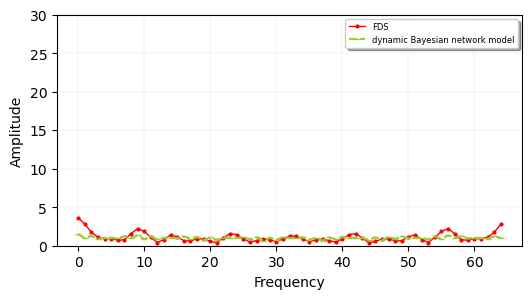

FFT 그래프 간의 상관관계: 0.6682363388548866


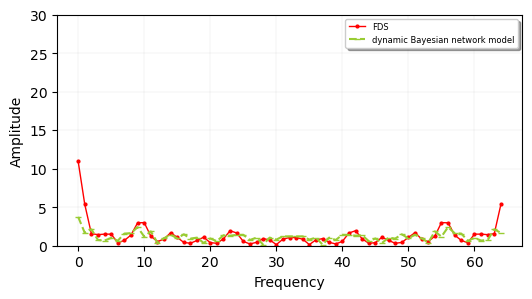

FFT 그래프 간의 상관관계: 0.8060806375492044


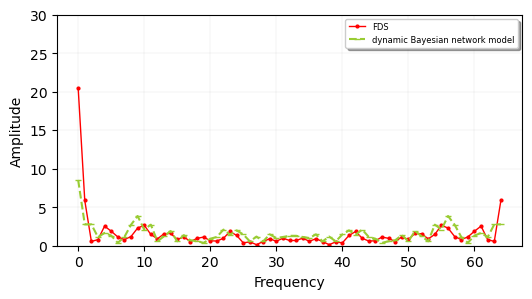

FFT 그래프 간의 상관관계: 0.8877213433677233


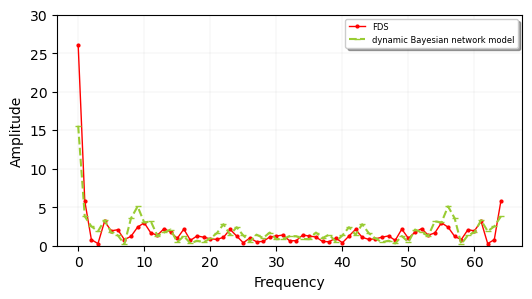

In [31]:
import numpy as np

def fft_calculation(predict, observe, plot=False):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
    if plot == True:
        plt.figure(figsize=(6,3))
        plt.plot(np.abs(observed_fft), label='FDS', color = '#ff0000', marker='o', markersize=2, linewidth=1)
        plt.plot(np.abs(predicted_fft), label='dynamic Bayesian network model', color='#99CC33', linestyle='--', marker='_', markersize=5, linewidth=1.5)
        plt.legend(shadow=True, prop={'size':6}, fancybox=True, loc='upper right')
        plt.grid(True, lw=0.1)
        #plt.title('FFT result comparison')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.ylim(0, 30, 10)
        plt.show()
    
    
fft_calculation(p_df_1st['probability (100s elapsed)'].values,Z_1, plot=True)
fft_calculation(p_df_2nd['probability (200s elapsed)'].values,Z_2, plot=True)
fft_calculation(p_df_3rd['probability (300s elapsed)'].values,Z_3, plot=True)
fft_calculation(p_df_4th['probability (400s elapsed)'].values,Z_4, plot=True)

In [22]:
def mean_absolute_error(y_true, y_pred):
    """
    평균 절대 오차(MAE)를 계산하는 함수
    :param y_true: 실제 값이 담긴 배열
    :param y_pred: 예측 값이 담긴 배열
    :return: MAE 값
    """
    n = len(y_true)
    if n != len(y_pred):
        raise ValueError("실제 값과 예측 값의 길이가 동일해야 합니다.")
    absolute_errors = [abs(y_true[i] - y_pred[i]) for i in range(n)]
    mae = sum(absolute_errors) / n
    return mae

print(mean_absolute_error(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(mean_absolute_error(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(mean_absolute_error(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(mean_absolute_error(p_df_4th['probability (400s elapsed)'].values,Z_4))

0.0388204583872679
0.12290563816557255
0.20419584840042088
0.21690763753033054


## 확률도 정규화 해보기

In [23]:
Z_P_1 = Z_normalized(p_df_1st['probability (100s elapsed)'].values, True)
Z_P_2 = Z_normalized(p_df_2nd['probability (200s elapsed)'].values, True)
Z_P_3 = Z_normalized(p_df_3rd['probability (300s elapsed)'].values, True)
Z_P_4 = Z_normalized(p_df_4th['probability (400s elapsed)'].values, True)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(Z_P_1,Z_1))
print('2:', pearsonr(Z_P_2,Z_2))
print('3:', pearsonr(Z_P_3,Z_3))
print('4:', pearsonr(Z_P_4,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(Z_P_1,Z_1))
print('2:', spearmanr(Z_P_2,Z_2))
print('3:', spearmanr(Z_P_3,Z_3))
print('4:', spearmanr(Z_P_4,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.8398431691692121, pvalue=2.277070947964538e-18)
2: PearsonRResult(statistic=0.6871341883650466, pvalue=2.602055022608329e-10)
3: PearsonRResult(statistic=0.6783080789251151, pvalue=5.363124027584518e-10)
4: PearsonRResult(statistic=0.6135275961477837, pvalue=5.513705571352264e-08)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.9221028581768564, pvalue=1.1389109919251513e-27)
2: SignificanceResult(statistic=0.7523658364757979, pvalue=4.992828724036445e-13)
3: SignificanceResult(statistic=0.717835523119435, pvalue=1.7028865958430788e-11)
4: SignificanceResult(statistic=0.6369457374505562, pvalue=1.1703700862487198e-08)


In [24]:
print('rmse1:', rmse_cal(Z_P_1,Z_1))
print('rmse2:', rmse_cal(Z_P_2,Z_2))
print('rmse3:', rmse_cal(Z_P_3,Z_3))
print('rmse4:', rmse_cal(Z_P_4,Z_4))

rmse1: 0.08581589441453893
rmse2: 0.17960133446224255
rmse3: 0.24517469090604135
rmse4: 0.2682816757511913


In [25]:
print('cv_rmse1:', cv_rmse(Z_P_1,Z_1))
print('cv_rmse2:', cv_rmse(Z_P_2,Z_2))
print('cv_rmse3:', cv_rmse(Z_P_3,Z_3))
print('cv_rmse4:', cv_rmse(Z_P_4,Z_4))

cv_rmse1: 1.5271511786843344
cv_rmse2: 1.066039336059691
cv_rmse3: 0.7771737336831387
cv_rmse4: 0.6679196016585123


FFT 그래프 간의 상관관계: 0.4161762066879702


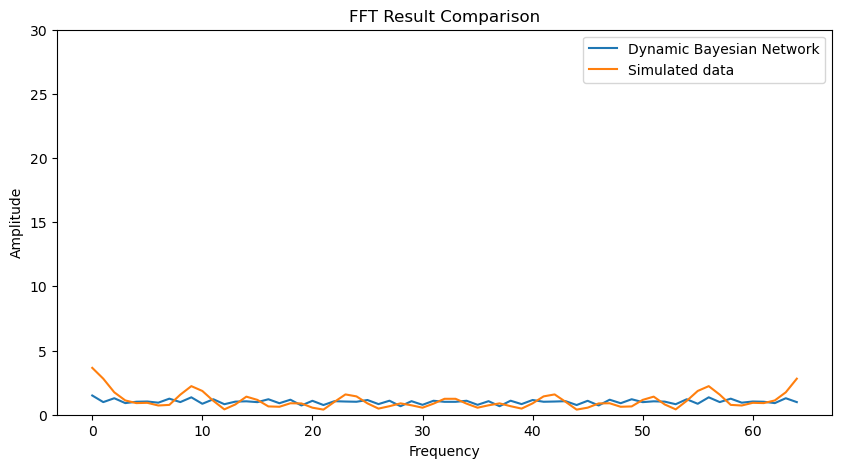

FFT 그래프 간의 상관관계: 0.668236338854887


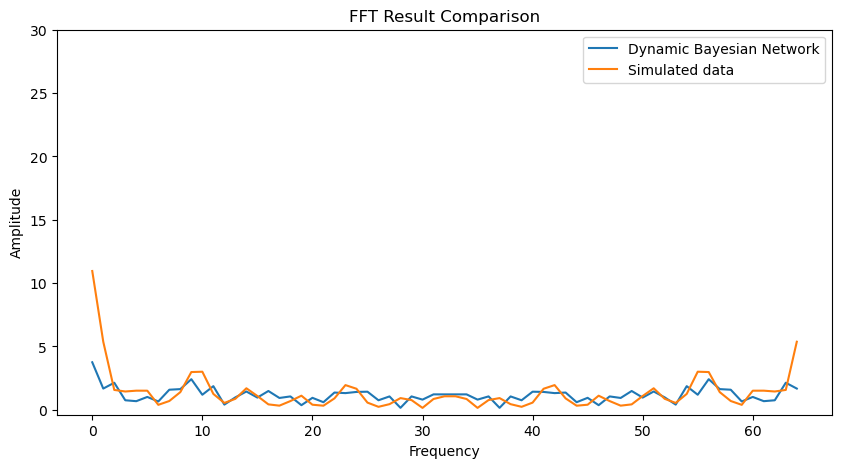

FFT 그래프 간의 상관관계: 0.8060806375492044


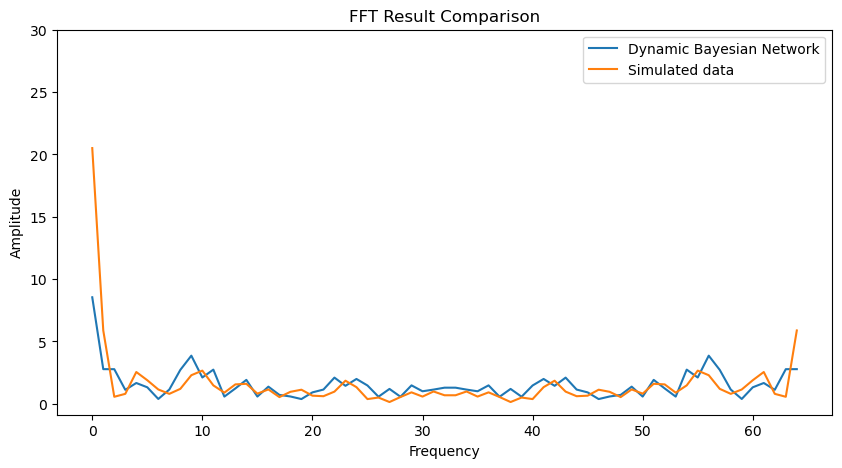

FFT 그래프 간의 상관관계: 0.8877213433677233


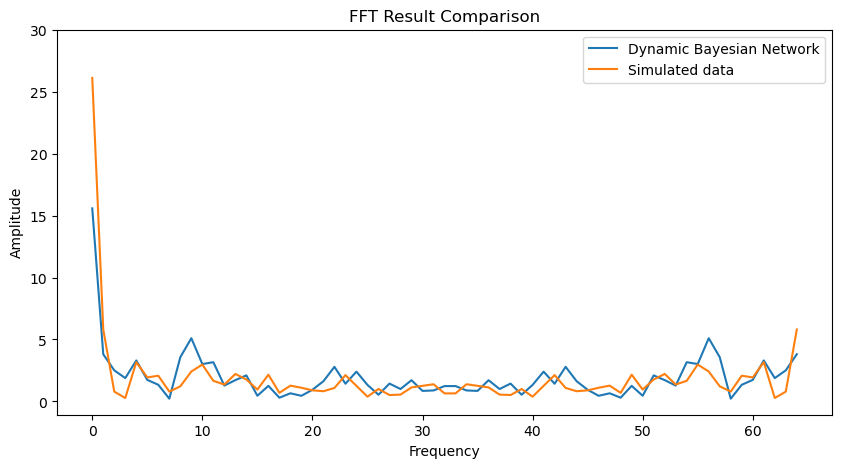

In [26]:
fft_calculation(Z_P_1,Z_1)
fft_calculation(Z_P_2,Z_2)
fft_calculation(Z_P_3,Z_3)
fft_calculation(Z_P_4,Z_4)

In [ ]:
# 유클리드 유사도 
def euclidean_distance(model, real):
    euclidean_distance = np.linalg.norm(model - real)
    return euclidean_distance

print('............EUCLIDEAN.............')
print(euclidean_distance(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(euclidean_distance(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(euclidean_distance(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(euclidean_distance(p_df_4th['probability (400s elapsed)'].values,Z_4))

# 코사인 유사도
from scipy.spatial.distance import cosine
def cosine_simularity(model, real):
    cosine_simularity = 1-cosine(model, real)
    return cosine_simularity

print('............COSINE.............')
print(cosine_simularity(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(cosine_simularity(p_df_2nd['probability (200s elapsed)'].values,Z_2))

In [27]:
print(cosine_simularity(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(cosine_simularity(p_df_4th['probability (400s elapsed)'].values,Z_4))

............EUCLIDEAN.............
0.6918698596707867
1.4479922503729745
1.9766615514439339
2.1629560190515607
............COSINE.............
0.8356680098753577
0.716505758357165
0.7617479572397339
0.8140387375415262


In [35]:
list(Z_4)

[0.782839325135429,
 0.6815536224631821,
 0.23243419796237344,
 0.25604975595116386,
 0.41318719500589673,
 0.35518142814651943,
 0.4145351911556115,
 0.21836916404316803,
 0.1863061777971094,
 0.6057900909028494,
 0.5251886932197256,
 0.6716074448417284,
 0.33447039994104827,
 0.37869689456946753,
 0.006975616323590255,
 0.0,
 0.12347020297112901,
 0.16580791780517026,
 0.15192576922430162,
 0.004496730074414772,
 0.032128428671665536,
 0.1949092326409682,
 0.5913826892038527,
 0.276835330684004,
 0.3504882101346647,
 0.2648264313709781,
 0.6170139488762914,
 0.17603546572460993,
 0.1463526665539186,
 0.13703306534785006,
 0.14233026018130446,
 0.36572767318116917,
 0.22171920572388798,
 0.2770999922775796,
 0.31068952217496776,
 0.23206874860693855,
 0.22053610092314518,
 0.782839325135429,
 0.7165839567947178,
 0.4561469342044423,
 0.43809489280241487,
 0.5566008432968801,
 0.5209450571742946,
 0.5894340365520045,
 0.440628510769242,
 0.866233379257279,
 0.7137773764356499,
 0.24259